In [1]:
import collections as ct
import graphviz as gv

# Algoritmo de menor distância

In [2]:
INF=999999999999 # valor arbitrário para infinito

def shortest_dist(graph, final_node):
    dist=[0]*len(graph) # setando vetor de distância
    for u in reversed(sorted(graph.keys())):
        dist[u]=INF # distância infinita caso não conhecida
        for weight, node in graph[u]:
            print(u, '--', node, '=', weight)
            dist[u]=min(dist[u], weight+dist[node]) # pegamos a menor distância dentre a menor conhecida
                                                    # e a nova explorada

    return dist[0] # retornamos menor distância do início 

# Implementando lista de adjagência

In [3]:
graph = ct.defaultdict(list)

# implementamos a lista de adjacência por meio de vetores
# para cada vetor temos suas conexões, primeiro valor é qual ele se conecta e segundo o peso dessa conexão
graph[0] = [(494, 4)]
graph[1] = [(561, 4)]
graph[2] = [(648, 4), (748, 5), (630, 6)]
graph[3] = [(275, 6), (528, 7)]
graph[4] = [(669, 7)]
graph[5] = [(402, 7), (493, 8), (609, 9)]
graph[6] = [(576, 9), (724, 10)]
graph[7] = [(452, 9), (320, 10)]
graph[7] = [(347, 11), (635, 12)]
graph[8] = [(667, 12), (424, 13)]
graph[9] = [(288, 13), (714, 14)]
graph[10] = [(421, 13),  (555, 14)]
graph[11] = [(478, 15), (598, 16)]
graph[12] = [(438, 15), (567, 17)]
graph[13] = [(613, 16), (539, 17)]
graph[14] = [(635, 17), (199, 18)]
graph[15] = [(465, 19), (593, 20)]
graph[16] = [(527, 19), (256, 20)]
graph[17] = [(545, 20), (501, 21), (601, 22)]
graph[18] = [(635, 21), (352, 22)]
graph[19] = [(532, 23), (717, 24)]
graph[20] = [(659, 23), (689, 24)]
graph[21] = [(435, 24), (434, 25), (495, 26)]
graph[22] = [(725, 25), (388, 26)]
graph[23] = [(680, 28), (259, 27)]
graph[24] = [(750, 28), (233, 27), (669, 30)]
graph[25] = [(397, 27), (206, 29), (480, 30)]
graph[26] = [(496, 29), (316, 30)]

In [5]:
INF=999999999999

dist=ct.defaultdict(lambda:0)
path=ct.defaultdict(lambda:0)

for u in reversed(sorted(graph.keys())):
    dist[u]=INF
    for weight, node in graph[u]:
        # print(u, '--', node, '=', weight)
        if (dist[u] > weight+dist[node]):
            # print('u = ', u, ' node = ', node, ' weight = ', weight, ' dist[u] = ', dist[u], ' dist[node] = ', dist[node])
            dist[u]=weight+dist[node]
            path[u]=node

# identificar o menor caminho para plotagem
print('PATH:\n0', end='')
i = 0
path_list = []
path_list.append(0)
final_nodes = [26, 27, 28, 29, 30]
print(path)
while (i not in final_nodes):
    i = path[i]
    path_list.append(i)
    print(' -- ', i, end='')
print()

PATH:
0defaultdict(<function <lambda> at 0x05C0AE40>, {26: 30, 25: 29, 24: 27, 23: 27, 22: 26, 21: 25, 20: 23, 19: 23, 18: 22, 17: 21, 16: 20, 15: 19, 14: 18, 13: 17, 12: 15, 11: 15, 10: 14, 9: 13, 8: 13, 7: 11, 6: 10, 5: 7, 4: 7, 3: 7, 2: 6, 1: 4, 0: 4})
 --  4 --  7 --  11 --  15 --  19 --  23 --  27


In [6]:
dot = gv.Digraph(comment='Multistage Graph')
cont = 0
for nodes in graph:
    temp = []
    temp.append(nodes)
    print(nodes)
    if(set(temp).intersection(path_list)):
        dot.node(str(nodes), str(nodes), color='blue')
    else:
        dot.node(str(nodes), str(nodes), color='red')
    cont+=1
    for v,u in graph[nodes]:
        if(nodes in path_list and u in path_list):
            dot.edge(str(nodes), str(u), label=str(v), color='blue')
        else:
            dot.edge(str(nodes), str(u), label=str(v))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [7]:
print(dot.source)

// Multistage Graph
digraph {
	0 [label=0 color=blue]
	0 -> 4 [label=494 color=blue]
	1 [label=1 color=red]
	1 -> 4 [label=561]
	2 [label=2 color=red]
	2 -> 4 [label=648]
	2 -> 5 [label=748]
	2 -> 6 [label=630]
	3 [label=3 color=red]
	3 -> 6 [label=275]
	3 -> 7 [label=528]
	4 [label=4 color=blue]
	4 -> 7 [label=669 color=blue]
	5 [label=5 color=red]
	5 -> 7 [label=402]
	5 -> 8 [label=493]
	5 -> 9 [label=609]
	6 [label=6 color=red]
	6 -> 9 [label=576]
	6 -> 10 [label=724]
	7 [label=7 color=blue]
	7 -> 11 [label=347 color=blue]
	7 -> 12 [label=635]
	8 [label=8 color=red]
	8 -> 12 [label=667]
	8 -> 13 [label=424]
	9 [label=9 color=red]
	9 -> 13 [label=288]
	9 -> 14 [label=714]
	10 [label=10 color=red]
	10 -> 13 [label=421]
	10 -> 14 [label=555]
	11 [label=11 color=blue]
	11 -> 15 [label=478 color=blue]
	11 -> 16 [label=598]
	12 [label=12 color=red]
	12 -> 15 [label=438]
	12 -> 17 [label=567]
	13 [label=13 color=red]
	13 -> 16 [label=613]
	13 -> 17 [label=539]
	14 [label=14 color=red]
	14 

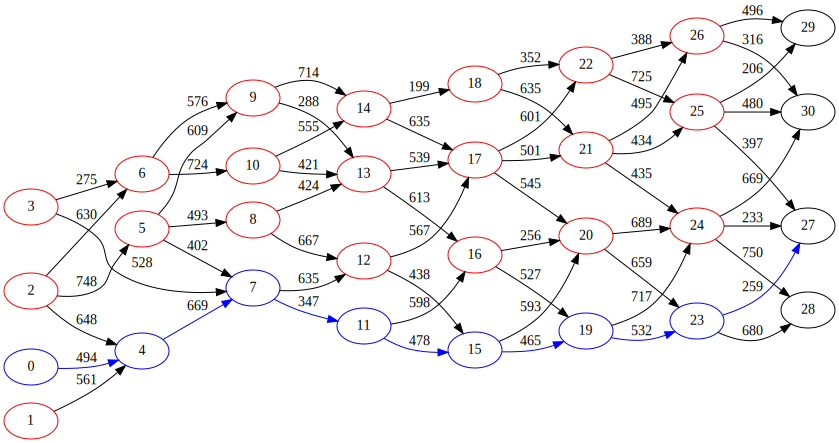

In [8]:
dot.attr(rankdir='LR')
dot

In [10]:
print(dist[0])
print(dist[1])
print(dist[2])
print(dist[3])

3244
3311
3164
2609


In [ ]:
graph['Seattle'] = [(494, 'Boise')]
graph['Newpoet'] = [(561, 'Boise')]
graph['San Francisco'] = [(648, 'Boise'), (748, 'Salt Lake'), (630, 'Las Vegas')]
graph['USC'] = [(275, 'Las Vegas'), (528, 'Tucson')]
graph['Boise'] = [(669, 'Casper')]
graph['Salt Lake'] = [(402, 'Casper'), (493, 'Denver'), (609, 'Albuquerque')]
graph['Las Vegas'] = [(576, 'Albuquerque'), (724, 'El Paso')]
graph['Tucson'] = [(452, 'Albuquerque'), (320, 'El Paso')]
graph['Casper'] = [(347, 'Pierre'), (635, 'Lincoln')]
graph['Denver'] = [(667, 'Lincoln'), (424, 'Amarillo')]
graph['Albuquerque'] = [(288, 'Amarillo'), (714, 'San Antonio')]
graph['El Paso'] = [(421, 'Amarillo'),  (555, 'San Antonio')]
graph['Pierre'] = [(478, 'Minneapolis'), (598, 'Kansas City')]
graph['Lincoln'] = [(438, 'Minneapolis'), (567, 'Ft. Smith')]
graph['Amarillo'] = [(613, 'Kansas City'), (539, 'Ft. Smith')]
graph['San Antonio'] = [(635, 'Ft. Smith'), (199, 'Houston')]
graph['Minneapolis'] = [(465, 'Chicago'), (593, 'St. Louis')]
graph['Kansas City'] = [(527, 'Chicago'), (256, 'St. Louis')]
graph['Ft. Smith'] = [(545, 'St. Louis'), (501, 'Nashville'), (601, 'New Orleans')]
graph['Houston'] = [(635, 'Nashville'), (352, 'New Orleans')]
graph['Chicago'] = [(532, 'Pittsburg'), (717, 'Roanoke')]
graph['St. Louis'] = [(659, 'Pittsburg'), (689, 'Roanoke')]
graph['Nashville'] = [(435, 'Roanoke'), (434, 'Charlotte'), (495, 'Tallahassee')]
graph['New Orleans'] = [(725, 'Charlotte'), (388, 'Tallahassee')]
graph['Pittsburg'] = [(680, 'MIT'), (259, 'Washington')]
graph['Roanoke'] = [(750, 'MIT'), (233, 'Washington'), (669, 'Daytona Beach')]
graph['Charlotte'] = [(397, 'Washington'), (206, 'Wilmington'), (480, 'Daytona Beach')]
graph['Tallahassee'] = [(496, 'Wilmington'), (316, 'Daytona Beach')]

In [ ]:
graph[0] = [(494, 4)]
graph[1] = [(561, 4)]
graph[2] = [(648, 4), (748, 5), (630, 6)]
graph[3] = [(275, 6), (528, 7)]
graph[4] = [(669, 7)]
graph[5] = [(402, 7), (493, 8), (609, 9)]
graph[6] = [(576, 9), (724, 10)]
graph[7] = [(452, 9), (320, 10)]
graph[7] = [(347, 11), (635, 12)]
graph[8] = [(667, 12), (424, 13)]
graph[9] = [(288, 13), (714, 14)]
graph[10] = [(421, 13),  (555, 14)]
graph[11] = [(478, 15), (598, 16)]
graph[12] = [(438, 15), (567, 17)]
graph[13] = [(613, 16), (539, 17)]
graph[14] = [(635, 17), (199, 18)]
graph[15] = [(465, 19), (593, 20)]
graph[16] = [(527, 19), (256, 20)]
graph[17] = [(545, 20), (501, 21), (601, 22)]
graph[18] = [(635, 21), (352, 22)]
graph[19] = [(532, 23), (717, 24)]
graph[20] = [(659, 23), (689, 24)]
graph[21] = [(435, 24), (434, 25), (495, 26)]
graph[22] = [(725, 25), (388, 26)]
graph[23] = [(680, 28), (259, 27)]
graph[24] = [(750, 28), (233, 27), (669, 30)]
graph[25] = [(397, 27), (206, 29), (480, 30)]
graph[26] = [(496, 29), (316, 30)]